In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tst import Transformer


In [5]:
def create_sequences(data, input_length, output_length):
    X, y = [], []
    for i in range(len(data) - input_length - output_length):
        X.append(data[i:(i + input_length)])
        # y.append(data[(i + input_length):(i + input_length + output_length), 2])  # Extracting only the 'Close' values
        y.append(data[i + input_length - 1, 2:3])  # 2 is the index of 'Close' in input_features
        # print(y)
    X = np.array(X)
    y = np.array(y)
    return X, y


# Checking if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device = ',device)

device =  cpu


In [6]:
# names_1 = 'fakedata.csv'
# pred_names = ['fakedata']
names_1 = 'gpt.csv'
pred_names = ['gpt']


names = names_1
num_stocks = 1

csv_data = pd.read_csv(os.path.join("data", names_1))
symbol_name = names_1.split('.')[0]
print(symbol_name)
csv_data

gpt


,Date,Open,High,Low,Close,Adj close,Volume,Sentiment_gpt,News_flag,Scaled_sentiment
0,2010-03-24 00:00:00+00:00,7.27,7.52,7.27,7.41,6.985713,4582900,3.000000,1.0,0.500025
1,2010-03-25 00:00:00+00:00,7.46,7.70,7.34,7.37,6.948005,5305800,3.000000,0.0,0.500025
2,2010-03-26 00:00:00+00:00,7.42,7.61,7.28,7.30,6.882012,4264400,3.000000,0.0,0.500025
3,2010-03-29 00:00:00+00:00,7.44,7.46,7.25,7.32,6.900869,2837000,3.000000,0.0,0.500025
4,2010-03-30 00:00:00+00:00,7.31,7.40,7.19,7.22,6.806592,3104800,3.000000,0.0,0.500025
...,...,...,...,...,...,...,...,...,...,...
3453,2023-12-11 00:00:00+00:00,13.76,13.79,13.61,13.72,13.720000,28383700,2.250000,1.0,0.312525
3454,2023-12-12 00:00:00+00:00,13.81,14.18,13.80,14.04,14.040000,34298800,2.833333,1.0,0.458358
3455,2023-12-13 00:00:00+00:00,13.88,14.15,13.64,14.09,14.090000,39046300,3.000000,1.0,0.500025
3456,2023-12-14 00:00:00+00:00,14.30,14.65,14.27,14.59,14.590000,42803900,2.000000,1.0,0.250025


In [7]:

# Preparing the data for the model
# Selecting relevant columns: 'Volume', 'Open', 'Close', and 'Scaled_sentiment'
data = csv_data[['Volume', 'Open', 'Close', 'Sentiment_gpt']].values
data


array([[4.58290000e+06, 7.26999998e+00, 7.40999985e+00, 3.00000000e+00],
       [5.30580000e+06, 7.46000004e+00, 7.36999989e+00, 3.00000000e+00],
       [4.26440000e+06, 7.42000008e+00, 7.30000019e+00, 3.00000000e+00],
       ...,
       [3.90463000e+07, 1.38800001e+01, 1.40900002e+01, 3.00000000e+00],
       [4.28039000e+07, 1.43000002e+01, 1.45900002e+01, 2.00000000e+00],
       [3.47257000e+07, 1.46300001e+01, 1.44899998e+01, 2.04877058e+00]])

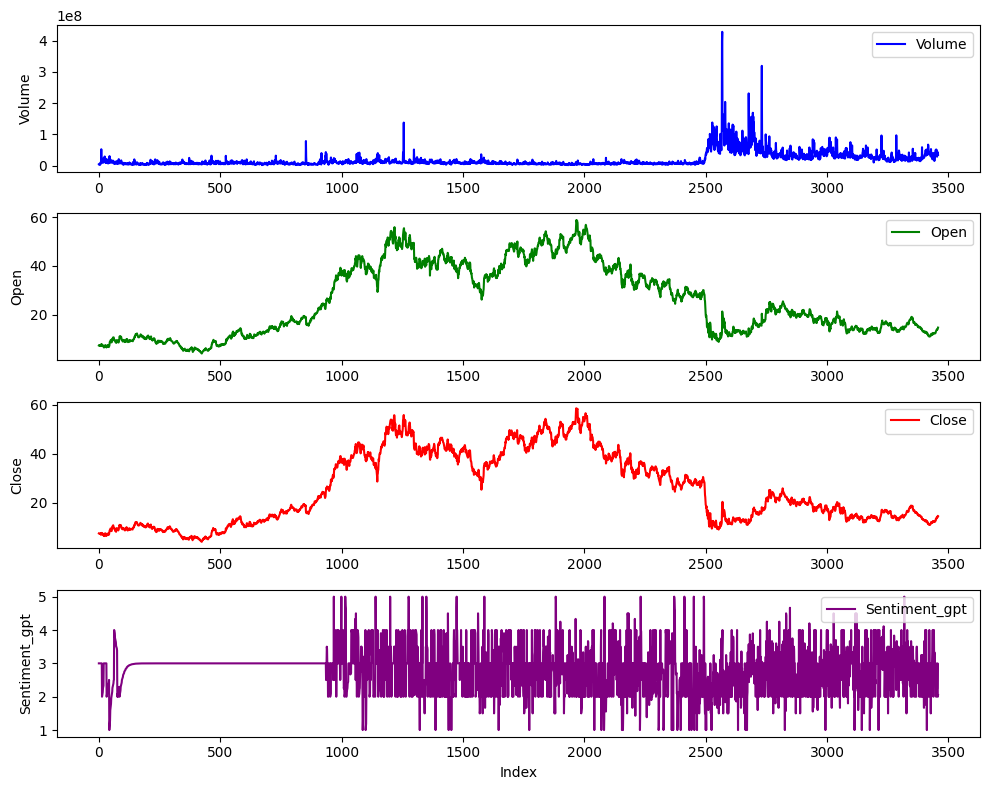

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'csv_data' is a Pandas DataFrame
data = csv_data[['Volume', 'Open', 'Close', 'Sentiment_gpt']].values

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))

# Extract each column for plotting
volume = data[:, 0]
open_price = data[:, 1]
close_price = data[:, 2]
sentiment = data[:, 3]

# Plot 'Volume'
axes[0].plot(volume, label='Volume', color='blue')
axes[0].set_ylabel('Volume')
axes[0].legend(loc='upper right')

# Plot 'Open'
axes[1].plot(open_price, label='Open', color='green')
axes[1].set_ylabel('Open')
axes[1].legend(loc='upper right')

# Plot 'Close'
axes[2].plot(close_price, label='Close', color='red')
axes[2].set_ylabel('Close')
axes[2].legend(loc='upper right')

# Plot 'Sentiment_gpt'
axes[3].plot(sentiment, label='Sentiment_gpt', color='purple')
axes[3].set_xlabel('Index')
axes[3].set_ylabel('Sentiment_gpt')
axes[3].legend(loc='upper right')

plt.tight_layout()
plt.show()


In [15]:
# Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Creating sequences
input_length = 50
output_length = 3
scaled_data

array([[0.0080113 , 0.05985401, 0.06260326, 0.5       ],
       [0.00970246, 0.06332117, 0.06186892, 0.5       ],
       [0.0072662 , 0.06259124, 0.06058381, 0.5       ],
       ...,
       [0.08863523, 0.18047445, 0.18523958, 0.5       ],
       [0.09742579, 0.18813869, 0.19441894, 0.25      ],
       [0.07852759, 0.19416058, 0.19258306, 0.26219264]])

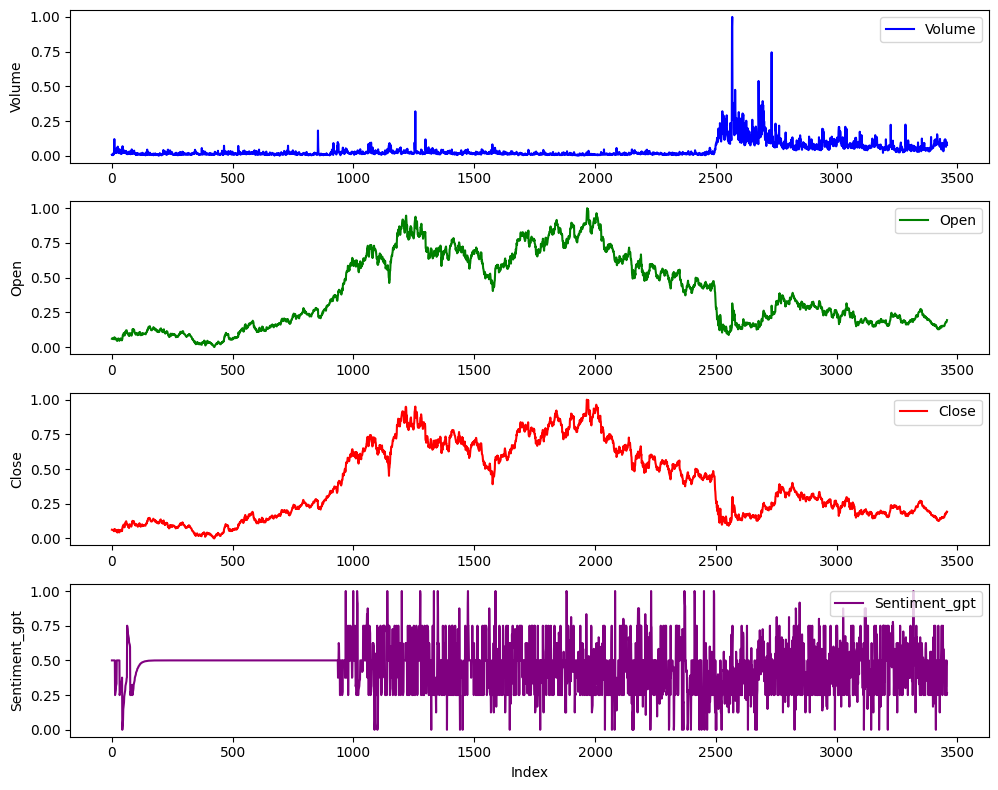

In [16]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))

# Extract each column for plotting

scaled_volume = scaled_data[:, 0]
scaled_open_price = scaled_data[:, 1]
scaled_close_price = scaled_data[:, 2]
scaled_sentiment = scaled_data[:, 3]

# Plot 'Volume'
axes[0].plot(scaled_volume, label='Volume', color='blue')
axes[0].set_ylabel('Volume')
axes[0].legend(loc='upper right')

# Plot 'Open'
axes[1].plot(scaled_open_price, label='Open', color='green')
axes[1].set_ylabel('Open')
axes[1].legend(loc='upper right')

# Plot 'Close'
axes[2].plot(scaled_close_price, label='Close', color='red')
axes[2].set_ylabel('Close')
axes[2].legend(loc='upper right')

# Plot 'Sentiment_gpt'
axes[3].plot(scaled_sentiment, label='Sentiment_gpt', color='purple')
axes[3].set_xlabel('Index')
axes[3].set_ylabel('Sentiment_gpt')
axes[3].legend(loc='upper right')

plt.tight_layout()
plt.show()


In [58]:
# Split training data into training and validation sets
split_ratio = 0.85
split = int(split_ratio * len(scaled_data))
data_train = scaled_data[:split]
data_test = scaled_data[split:]

# Splitting the dataset into training and testing sets (80-20 split)
X_train, y_train = create_sequences(data_train, input_length, output_length)
X_test, y_test = create_sequences(data_test, input_length, output_length)





# Displaying the shapes of the datasets to ensure correctness
print('X_train: ',X_train.shape, 'X_test', X_test.shape, 'y_train', y_train.shape, 'y_test',y_test.shape)


X_train:  (2886, 50, 4) X_test (466, 50, 4) y_train (2886, 1) y_test (466, 1)


In [63]:
print(X_train)

[[[-5.71371249e-01 -1.26038477e+00 -1.24930855e+00  2.94753687e-01]
  [-5.41277451e-01 -1.24733084e+00 -1.25205682e+00  2.94753687e-01]
  [-5.84630170e-01 -1.25007903e+00 -1.25686629e+00  2.94753687e-01]
  ...
  [-3.46048675e-01 -1.16625904e+00 -1.16479895e+00 -1.95657626e+00]
  [ 3.63661039e-02 -1.15389220e+00 -1.10983343e+00 -1.84677760e+00]
  [-2.87880099e-01 -1.10373759e+00 -1.12563600e+00 -1.74233389e+00]]

 [[-5.41277451e-01 -1.24733084e+00 -1.25205682e+00  2.94753687e-01]
  [-5.84630170e-01 -1.25007903e+00 -1.25686629e+00  2.94753687e-01]
  [-6.44051787e-01 -1.24870494e+00 -1.25549215e+00  2.94753687e-01]
  ...
  [ 3.63661039e-02 -1.15389220e+00 -1.10983343e+00 -1.84677760e+00]
  [-2.87880099e-01 -1.10373759e+00 -1.12563600e+00 -1.74233389e+00]
  [-3.37718658e-01 -1.15251807e+00 -1.16823431e+00 -1.64298396e+00]]

 [[-5.84630170e-01 -1.25007903e+00 -1.25686629e+00  2.94753687e-01]
  [-6.44051787e-01 -1.24870494e+00 -1.25549215e+00  2.94753687e-01]
  [-6.32903469e-01 -1.25763658e+

In [64]:
print(y_train)

[[-1.125636  ]
 [-1.16823431]
 [-1.18472397]
 ...
 [-0.36436281]
 [-0.36230168]
 [-0.39528099]]


In [66]:
# Converting data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)  # Transposing to match model's input shape
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
# print("Check")
print(X_train_tensor)

tensor([[[-5.7137e-01, -1.2604e+00, -1.2493e+00,  2.9475e-01],
         [-5.4128e-01, -1.2473e+00, -1.2521e+00,  2.9475e-01],
         [-5.8463e-01, -1.2501e+00, -1.2569e+00,  2.9475e-01],
         ...,
         [-3.4605e-01, -1.1663e+00, -1.1648e+00, -1.9566e+00],
         [ 3.6366e-02, -1.1539e+00, -1.1098e+00, -1.8468e+00],
         [-2.8788e-01, -1.1037e+00, -1.1256e+00, -1.7423e+00]],

        [[-5.4128e-01, -1.2473e+00, -1.2521e+00,  2.9475e-01],
         [-5.8463e-01, -1.2501e+00, -1.2569e+00,  2.9475e-01],
         [-6.4405e-01, -1.2487e+00, -1.2555e+00,  2.9475e-01],
         ...,
         [ 3.6366e-02, -1.1539e+00, -1.1098e+00, -1.8468e+00],
         [-2.8788e-01, -1.1037e+00, -1.1256e+00, -1.7423e+00],
         [-3.3772e-01, -1.1525e+00, -1.1682e+00, -1.6430e+00]],

        [[-5.8463e-01, -1.2501e+00, -1.2569e+00,  2.9475e-01],
         [-6.4405e-01, -1.2487e+00, -1.2555e+00,  2.9475e-01],
         [-6.3290e-01, -1.2576e+00, -1.2624e+00,  2.9475e-01],
         ...,
         

In [67]:
print(y_train_tensor)

tensor([[-1.1256],
        [-1.1682],
        [-1.1847],
        ...,
        [-0.3644],
        [-0.3623],
        [-0.3953]])


In [70]:
import torch
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create a DataLoader for training data
batch_size = 64  # Adjust the batch size as needed
dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [72]:
from tqdm import tqdm

d_input = 4 # this one should be 4 assume it is 'Volume','Open', 'Close', 'Scaled_sentiment'
d_output = 1 # prediction length be 3, this is confirmed
d_model = 32 # Lattent dim
q = 8 # Query size
v = 8 # Value size
h = 8 # Number of heads
N = 4 # Number of encoder and decoder to stack
attention_size = 30 # Attention window size
dropout = 0.1 # Dropout rate
pe = 'regular' # Positional encoding
chunk_mode = None
# Creating sequences
epochs = 20

# Creating the model
model = Transformer(d_input, d_model, d_output, q, v, h, N, attention_size=attention_size, dropout=dropout, chunk_mode=chunk_mode, pe=pe).to(device)
# model = TimeSeriesTransformer(num_features, num_outputs, dim_val, n_heads, n_decoder_layers, dropout_rate).to(device)
print(model)
# Loss function and optimizer
loss_function = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


# # Training parameters
# num_batches = int(len(X_train) / batch_size)

# # Training loop
# model.train()
# for epoch in range(epochs):
#   total_loss = 0
#   with tqdm(total=len(dataloader_train.dataset), desc=f"[Epoch {epoch+1:3d}/{epochs}]") as pbar:
#     for b, (x, y) in enumerate(dataloader_train):
#         start_index = b * batch_size
#         end_index = start_index + batch_size
#         x_batch = X_train_tensor[start_index:end_index]
#         y_batch = y_train_tensor[start_index:end_index]

#         # print('x_batch',x_batch.shape)
#         # print('y_batch',y_batch.shape)

#         # Forward pass
#         y_pred = model(x_batch)

#         # print('y_pred',y_pred.shape)

#         loss = loss_function(y_pred, y_batch)

#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#   print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / num_batches}")

# print("Training complete.")

model.train()
# Prepare loss history
hist_loss = np.zeros(epochs)
for idx_epoch in range(epochs):
    running_loss = 0
    with tqdm(total=len(dataloader_train.dataset), desc=f"[Epoch {idx_epoch+1:3d}/{epochs}]") as pbar:
        for idx_batch, (x, y) in enumerate(dataloader_train):
            optimizer.zero_grad()
            print('x type', x.type)
            # Propagate input
            netout = model(x.to(device))

            # Comupte loss
            loss = loss_function(y.to(device), netout)

            # Backpropage loss
            loss.backward()

            # Update weights
            optimizer.step()

            running_loss += loss.item()
            pbar.set_postfix({'loss': running_loss/(idx_batch+1)})
            pbar.update(x.shape[0])
        
        train_loss = running_loss/len(dataloader_train)
        pbar.set_postfix({'loss': train_loss})
        
        hist_loss[idx_epoch] = train_loss
        
print("Training complete.")
        
plt.plot(hist_loss, 'o-', label='train')
plt.legend()



Transformer(
  (layers_encoding): ModuleList(
    (0-3): 4 x Encoder(
      (_selfAttention): MultiHeadAttention(
        (_W_q): Linear(in_features=32, out_features=64, bias=True)
        (_W_k): Linear(in_features=32, out_features=64, bias=True)
        (_W_v): Linear(in_features=32, out_features=64, bias=True)
        (_W_o): Linear(in_features=64, out_features=32, bias=True)
      )
      (_feedForward): PositionwiseFeedForward(
        (_linear1): Linear(in_features=32, out_features=2048, bias=True)
        (_linear2): Linear(in_features=2048, out_features=32, bias=True)
      )
      (_layerNorm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
      (_layerNorm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
      (_dopout): Dropout(p=0.1, inplace=False)
    )
  )
  (layers_decoding): ModuleList(
    (0-3): 4 x Decoder(
      (_selfAttention): MultiHeadAttention(
        (_W_q): Linear(in_features=32, out_features=64, bias=True)
        (_W_k): Linear(in_features=3

[Epoch   1/20]:   0%|          | 0/2886 [00:00<?, ?it/s]

x type <built-in method type of Tensor object at 0x7fc1ebac2a40>


[Epoch   1/20]:   2%|▏         | 64/2886 [00:00<00:23, 120.69it/s, loss=1.21]

x type <built-in method type of Tensor object at 0x7fc1cce147c0>


[Epoch   1/20]:   4%|▍         | 128/2886 [00:01<00:21, 127.82it/s, loss=1.1]

x type <built-in method type of Tensor object at 0x7fc1cce4f590>


[Epoch   1/20]:   7%|▋         | 192/2886 [00:01<00:21, 123.11it/s, loss=1.05]

x type <built-in method type of Tensor object at 0x7fc1cce4f4f0>


[Epoch   1/20]:   9%|▉         | 256/2886 [00:01<00:20, 130.65it/s, loss=0.981]

x type <built-in method type of Tensor object at 0x7fc1eba715e0>


[Epoch   1/20]:  11%|█         | 320/2886 [00:02<00:19, 134.26it/s, loss=0.896]

x type <built-in method type of Tensor object at 0x7fc1eba71630>


[Epoch   1/20]:  13%|█▎        | 384/2886 [00:02<00:18, 137.81it/s, loss=0.882]

x type <built-in method type of Tensor object at 0x7fc1eba715e0>


[Epoch   1/20]:  16%|█▌        | 448/2886 [00:03<00:17, 138.86it/s, loss=0.843]

x type <built-in method type of Tensor object at 0x7fc1eba71ea0>


[Epoch   1/20]:  18%|█▊        | 512/2886 [00:03<00:17, 134.53it/s, loss=0.809]

x type <built-in method type of Tensor object at 0x7fc1eba71e00>


[Epoch   1/20]:  20%|█▉        | 576/2886 [00:04<00:17, 130.85it/s, loss=0.789]

x type <built-in method type of Tensor object at 0x7fc1cce35ea0>


[Epoch   1/20]:  22%|██▏       | 640/2886 [00:04<00:17, 125.68it/s, loss=0.77] 

x type <built-in method type of Tensor object at 0x7fc1cce35f90>


[Epoch   1/20]:  24%|██▍       | 704/2886 [00:05<00:17, 125.61it/s, loss=0.761]

x type <built-in method type of Tensor object at 0x7fc1cce14540>


[Epoch   1/20]:  27%|██▋       | 768/2886 [00:05<00:16, 124.64it/s, loss=0.734]

x type <built-in method type of Tensor object at 0x7fc1cce14d60>


[Epoch   1/20]:  29%|██▉       | 832/2886 [00:06<00:16, 126.51it/s, loss=0.723]

x type <built-in method type of Tensor object at 0x7fc1cce14900>


[Epoch   1/20]:  31%|███       | 896/2886 [00:06<00:15, 128.77it/s, loss=0.714]

x type <built-in method type of Tensor object at 0x7fc1cce50590>


[Epoch   1/20]:  33%|███▎      | 960/2886 [00:07<00:14, 128.99it/s, loss=0.7]  

x type <built-in method type of Tensor object at 0x7fc1cce35ea0>


[Epoch   1/20]:  35%|███▌      | 1024/2886 [00:07<00:14, 128.85it/s, loss=0.691]

x type <built-in method type of Tensor object at 0x7fc1cce35040>


[Epoch   1/20]:  38%|███▊      | 1088/2886 [00:08<00:13, 131.47it/s, loss=0.68] 

x type <built-in method type of Tensor object at 0x7fc1cce4f590>


[Epoch   1/20]:  40%|███▉      | 1152/2886 [00:08<00:13, 129.66it/s, loss=0.672]

x type <built-in method type of Tensor object at 0x7fc1cce14680>


[Epoch   1/20]:  42%|████▏     | 1216/2886 [00:09<00:12, 132.41it/s, loss=0.664]

x type <built-in method type of Tensor object at 0x7fc1cce14d60>


[Epoch   1/20]:  44%|████▍     | 1280/2886 [00:09<00:12, 132.70it/s, loss=0.655]

x type <built-in method type of Tensor object at 0x7fc1cce144f0>


[Epoch   1/20]:  47%|████▋     | 1344/2886 [00:10<00:11, 135.47it/s, loss=0.649]

x type <built-in method type of Tensor object at 0x7fc1cce50590>


[Epoch   1/20]:  49%|████▉     | 1408/2886 [00:10<00:10, 137.70it/s, loss=0.652]

x type <built-in method type of Tensor object at 0x7fc1cce35720>


[Epoch   1/20]:  51%|█████     | 1472/2886 [00:11<00:10, 139.70it/s, loss=0.649]

x type <built-in method type of Tensor object at 0x7fc1cce35d60>


[Epoch   1/20]:  53%|█████▎    | 1536/2886 [00:11<00:09, 137.40it/s, loss=0.637]

x type <built-in method type of Tensor object at 0x7fc1cce4f590>


[Epoch   1/20]:  55%|█████▌    | 1600/2886 [00:12<00:09, 137.40it/s, loss=0.632]

x type <built-in method type of Tensor object at 0x7fc1cce50590>


[Epoch   1/20]:  58%|█████▊    | 1664/2886 [00:12<00:08, 140.32it/s, loss=0.628]

x type <built-in method type of Tensor object at 0x7fc1cce35040>


[Epoch   1/20]:  60%|█████▉    | 1728/2886 [00:13<00:08, 140.20it/s, loss=0.626]

x type <built-in method type of Tensor object at 0x7fc1cce35310>


[Epoch   1/20]:  62%|██████▏   | 1792/2886 [00:13<00:07, 140.67it/s, loss=0.622]

x type <built-in method type of Tensor object at 0x7fc1cce4f590>


[Epoch   1/20]:  64%|██████▍   | 1856/2886 [00:14<00:07, 131.66it/s, loss=0.617]

x type <built-in method type of Tensor object at 0x7fc1cce50590>


[Epoch   1/20]:  67%|██████▋   | 1920/2886 [00:14<00:07, 131.85it/s, loss=0.612]

x type <built-in method type of Tensor object at 0x7fc1cce4f590>


[Epoch   1/20]:  69%|██████▊   | 1984/2886 [00:14<00:06, 133.25it/s, loss=0.61] 

x type <built-in method type of Tensor object at 0x7fc1cce355e0>


[Epoch   1/20]:  71%|███████   | 2048/2886 [00:15<00:06, 132.99it/s, loss=0.606]

x type <built-in method type of Tensor object at 0x7fc1cce35900>


[Epoch   1/20]:  73%|███████▎  | 2112/2886 [00:16<00:06, 126.72it/s, loss=0.603]

x type <built-in method type of Tensor object at 0x7fc1cce355e0>


[Epoch   1/20]:  75%|███████▌  | 2176/2886 [00:16<00:05, 123.77it/s, loss=0.597]

x type <built-in method type of Tensor object at 0x7fc1cce50590>


[Epoch   1/20]:  78%|███████▊  | 2240/2886 [00:17<00:05, 123.47it/s, loss=0.591]

x type <built-in method type of Tensor object at 0x7fc1cce4f590>


[Epoch   1/20]:  80%|███████▉  | 2304/2886 [00:17<00:04, 119.21it/s, loss=0.59] 

x type <built-in method type of Tensor object at 0x7fc1cce35590>


[Epoch   1/20]:  82%|████████▏ | 2368/2886 [00:18<00:04, 118.71it/s, loss=0.586]

x type <built-in method type of Tensor object at 0x7fc1cce35630>


[Epoch   1/20]:  84%|████████▍ | 2432/2886 [00:18<00:03, 129.65it/s, loss=0.585]


x type <built-in method type of Tensor object at 0x7fc1cce35d60>


KeyboardInterrupt: 